# Import Library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import ssl
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pickle
import gudhi
from sklearn.preprocessing import MinMaxScaler
from numpy import linalg
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
import datetime
from statsmodels.tsa.stattools import acf
#import dionysus as d
from scipy.stats import kendalltau
#from mk_test import mk_test

import csv
import time as tm
import seaborn as sns
%matplotlib inline

# Download Data

In [2]:
ssl._create_default_https_context = ssl._create_unverified_context
datagrep=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
datagrep=datagrep.iloc[:,0:834]

# Plot Data

In [4]:
datagrep

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/22,4/22/22,4/23/22,4/24/22,4/25/22,4/26/22,4/27/22,4/28/22,4/29/22,4/30/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,178611,178638,178648,178689,178745,178769,178809,178850,178873,178879
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,274606,274737,274791,274828,274828,274862,274929,275002,275055,275107
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265754,265761,265761,265767,265771,265772,265773,265776,265779,265780
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,41013,41013,41013,41013,41013,41013,41013,41349,41349,41349
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,656876,656876,656876,656876,656876,657060,657060,657060,657060,657060
280,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
281,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11818,11818,11818,11818,11818,11818,11818,11818,11818,11818
282,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,318984,318984,318984,318984,319316,319431,319431,319594,319594,319594


In [5]:
countries_JH=datagrep['Country/Region'].unique().tolist()
dates_JH=list(datagrep)[4:]

In [6]:
N=[]
for c in countries_JH:
    L=datagrep[datagrep['Country/Region']==c][dates_JH].sum().values.tolist()
    N.append(L)
Data_df=pd.DataFrame(np.array(N).T).rename(columns={i:countries_JH[i] for i in range(len(countries_JH))}) 

In [7]:
Data_df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,178769,274862,265772,41013,99287,11,7571,9072230,422838,5796700,...,895775,238510,6952,522243,10620203,657060,535,11818,319431,247667
826,178809,274929,265773,41013,99287,11,7571,9072230,422855,5847576,...,895775,238535,7054,522263,10631516,657060,535,11818,319431,247729
827,178850,275002,265776,41349,99287,11,7604,9072230,422858,5889356,...,895775,238556,7151,522263,10638632,657060,535,11818,319594,247784
828,178873,275055,265779,41349,99287,11,7626,9072230,422865,5927528,...,897867,238577,7330,522305,10644700,657060,535,11818,319594,247842


In [8]:
total = Data_df.sum(axis=1)

print(total)

0            557
1            657
2            944
3           1437
4           2120
         ...    
825    510905314
826    511749385
827    512474826
828    513147524
829    513542568
Length: 830, dtype: int64


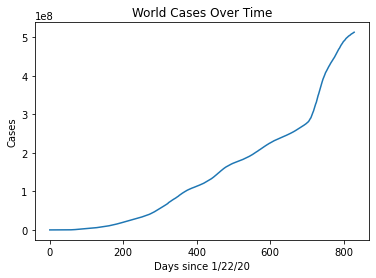

In [10]:
plt.plot(total)
plt.title('World Cases Over Time')
plt.xlabel('Days since 1/22/20')
plt.ylabel('Cases')
plt.show()

<AxesSubplot:>

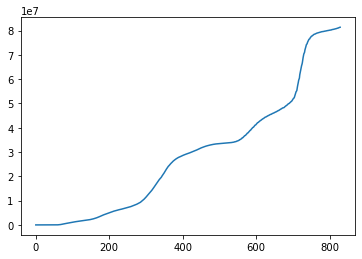

In [11]:
Data_df['US'].plot()

# Transform Data

In [12]:
datah_nc=[]
for c in countries_JH:
    L=Data_df[c].to_list()
    L1=[]
    L1.append(L[0])
    for i in range(1,len(L)-1):
        L1.append([L[i+1]-L[i] if L[i+1]-L[i]>=0 else 0][0])
    datah_nc.append(L1)  
data_nc=pd.DataFrame(np.array(datah_nc).T).rename(columns={i:countries_JH[i] for i in range(len(countries_JH))}) 
Df=data_nc.copy()

# Visualize Data

In [13]:
ts=Data_df

<AxesSubplot:>

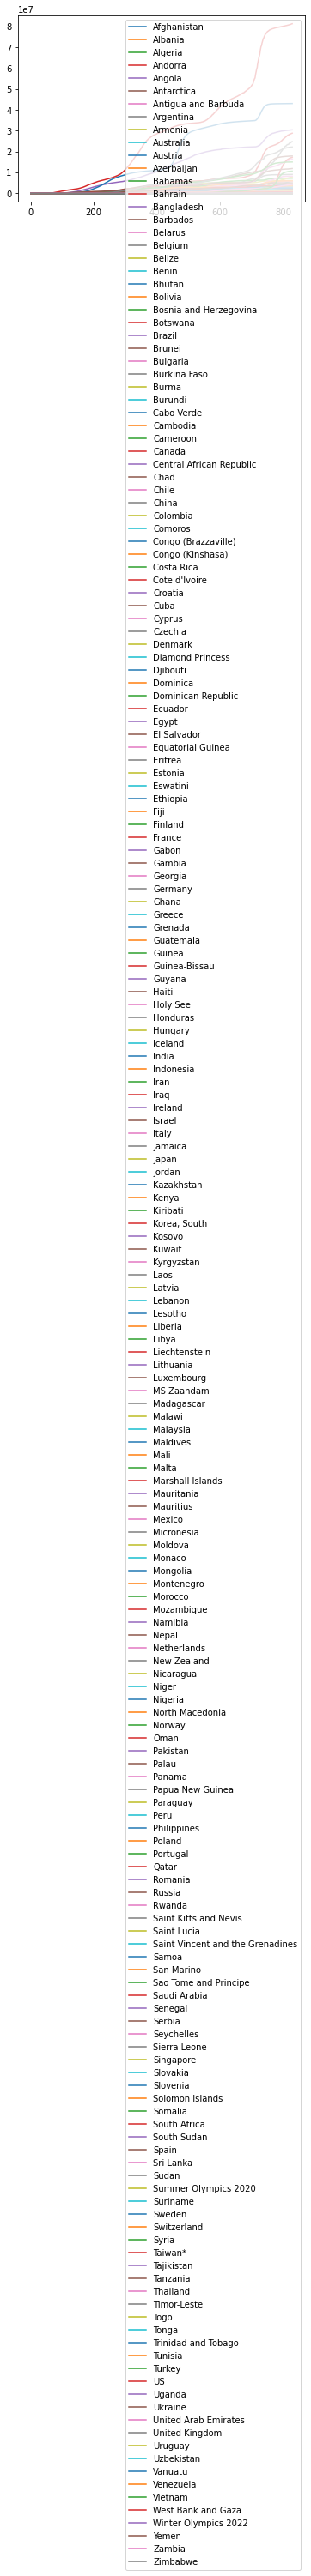

In [14]:
ts.plot()

In [15]:
ratios = np.square((ts+1) / np.roll((ts+1), -1, axis=0))[:-1]

In [16]:
ratios

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.111111,1.00000,1.0,1.0,1.00000,1.000000
1,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,1.0,1.00000,1.000000
2,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,1.0,1.00000,1.000000
3,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,0.040000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,1.0,1.00000,1.000000
4,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,0.694444,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,1.0,1.00000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,0.999732,0.999753,0.999992,1.000000,1.0,1.0,1.000000,1.0,0.999953,0.986278,...,1.000000,0.999941,0.973712,0.999966,0.990900,0.99944,1.0,1.0,0.99928,0.999443
825,0.999553,0.999513,0.999992,1.000000,1.0,1.0,1.000000,1.0,0.999920,0.982675,...,1.000000,0.999790,0.971293,0.999923,0.997873,1.00000,1.0,1.0,1.00000,0.999500
826,0.999542,0.999469,0.999977,0.983815,1.0,1.0,0.991340,1.0,0.999986,0.985862,...,1.000000,0.999824,0.973059,1.000000,0.998663,1.00000,1.0,1.0,0.99898,0.999556
827,0.999743,0.999615,0.999977,1.000000,1.0,1.0,0.994239,1.0,0.999967,0.987162,...,0.995346,0.999824,0.951762,0.999839,0.998860,1.00000,1.0,1.0,1.00000,0.999532


In [17]:
tsdf = pd.DataFrame(ratios)
ddin=np.array(dates_JH[:-1])
tsdf['date'] = ddin.tolist()
tsdf

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe,date
0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.111111,1.00000,1.0,1.0,1.00000,1.000000,1/22/20
1,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,1.0,1.00000,1.000000,1/23/20
2,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,1.0,1.00000,1.000000,1/24/20
3,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,0.040000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,1.0,1.00000,1.000000,1/25/20
4,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,0.694444,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,1.0,1.00000,1.000000,1/26/20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,0.999732,0.999753,0.999992,1.000000,1.0,1.0,1.000000,1.0,0.999953,0.986278,...,0.999941,0.973712,0.999966,0.990900,0.99944,1.0,1.0,0.99928,0.999443,4/25/22
825,0.999553,0.999513,0.999992,1.000000,1.0,1.0,1.000000,1.0,0.999920,0.982675,...,0.999790,0.971293,0.999923,0.997873,1.00000,1.0,1.0,1.00000,0.999500,4/26/22
826,0.999542,0.999469,0.999977,0.983815,1.0,1.0,0.991340,1.0,0.999986,0.985862,...,0.999824,0.973059,1.000000,0.998663,1.00000,1.0,1.0,0.99898,0.999556,4/27/22
827,0.999743,0.999615,0.999977,1.000000,1.0,1.0,0.994239,1.0,0.999967,0.987162,...,0.999824,0.951762,0.999839,0.998860,1.00000,1.0,1.0,1.00000,0.999532,4/28/22


<AxesSubplot:>

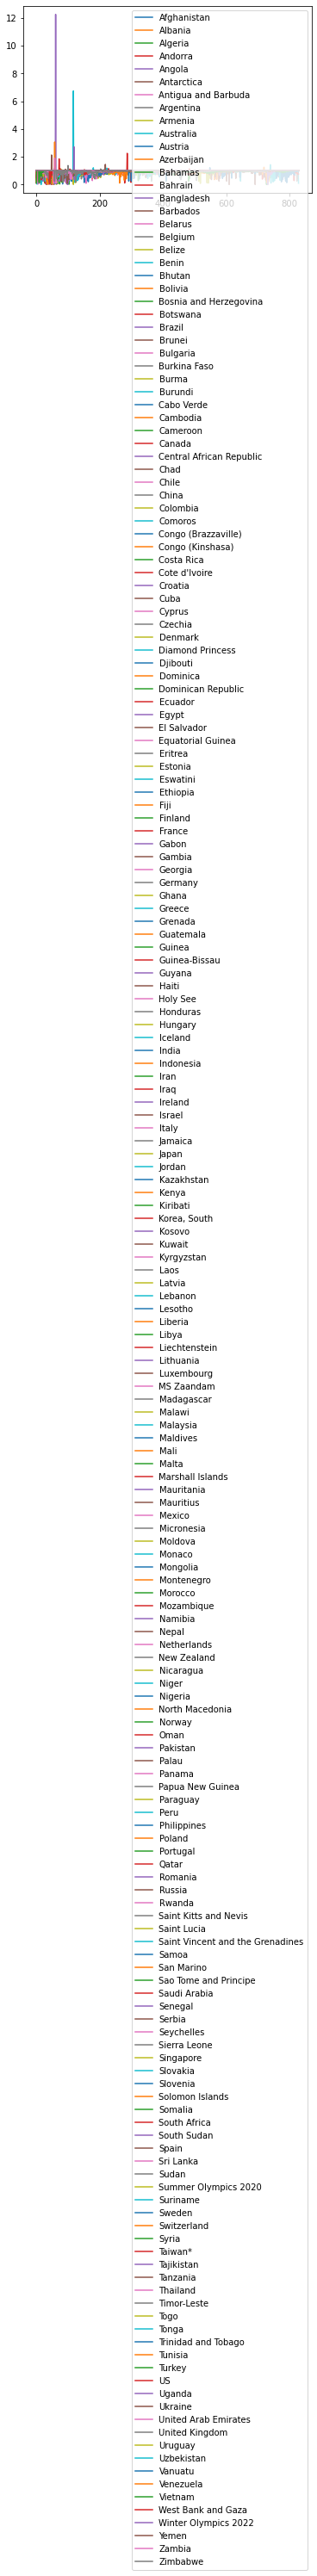

In [18]:
tsdf.plot()

In [19]:
# Persistent landscape function
def compute_persistent_landscape(dgm, k, xmin, xmax, nb_nodes, nb_ld):
    
    # Preprocessing: get the birth/death points for the dimension
    points = list(map(lambda x: x[1], filter(lambda x: x[0] == k, dgm)))
    
    landscape = np.zeros((nb_ld,nb_nodes))
    node_size = (xmax - xmin) / (nb_nodes - 1)
    for node in range(nb_nodes):
        x = xmin + node * node_size
        
        # Construct the piecewise function for this node
        lmbda_k = []
        for b, d in filter(lambda y: y[0] <= x <= y[1], points):
            if x >= (d+b)/2.0:
                lmbda_k.append(d-x)
            else:
                lmbda_k.append(x-b)
                  
        # Sort the points and add it to the landscape
        lmbda_k = np.array(list(reversed(sorted(lmbda_k))))
        for j in range(nb_ld):
            if j < len(lmbda_k):
                landscape[j,node]=lmbda_k[j]
    
    return landscape

In [20]:
def idx(date):
    return tsdf[tsdf.date == date].index.values[0]

In [21]:
w=80

index=idx('4/29/22') - w

X_n = tsdf.iloc[index:index+w].drop('date', axis=1).values


rips = gudhi.RipsComplex(points=X_n, max_edge_length=12)
simplex_tree = rips.create_simplex_tree(max_dimension=2) # Number of homological dimensions, 1 = loops, 2 = voids
dgm = simplex_tree.persistence()

nb_nodes = 100
nb_ld = 1

vals = np.array(list(map(lambda x: x[1], filter(lambda x: x[0] == 1, dgm))))
xmin = np.min(vals) - 0.001
xmax = np.max(vals) + 0.005
L = compute_persistent_landscape(dgm, 1, xmin, xmax, nb_nodes, nb_ld)

usetex mode requires TeX.


<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

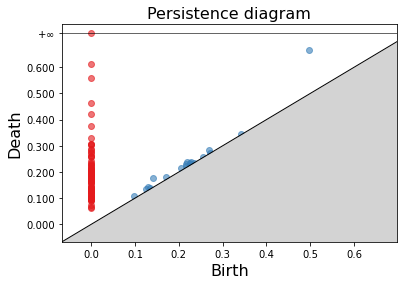

In [22]:
gudhi.plot_persistence_diagram(dgm)

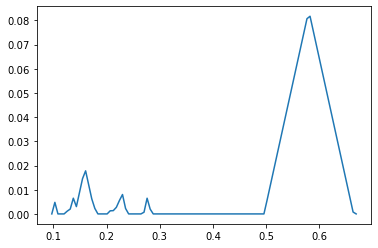

In [23]:
plt.plot(np.linspace(xmin, xmax, num=nb_nodes), L[:nb_ld,:].transpose())

In [24]:
# Compute L1 and L2 norms from the persistent landscapes
def compute_landscape_norms(start_idx, end_idx, w):
    nb_nodes = 100
    nb_ld = 1

    L1 = []
    L2 = []
    for i in range(start_idx, end_idx):
        cut = tsdf.iloc[i:i+w].drop('date', axis=1).values

        rips = gudhi.RipsComplex(points=cut, max_edge_length=12)
        tree = rips.create_simplex_tree(max_dimension=2)

        dgm = tree.persistence()

        # Get the values for only dimension 1 and compute the min and max
        vals = np.array(list(map(lambda x: x[1], filter(lambda x: x[0] == 1, dgm))))
        try:
            xmin = np.min(vals)
            xmax = np.max(vals)

            # Compute the persistent landscape
            L = compute_persistent_landscape(dgm, 1, xmin, xmax, nb_nodes, nb_ld)

            # Calculate and save the norms
            L1.append(np.linalg.norm(L, ord=1))
            L2.append(np.linalg.norm(L, ord=2))
        except:
            L1.append(0)
            L2.append(0)
        
    return np.array(L1), np.array(L2)

In [25]:
w = 80
period = 810
may = idx('4/29/22')
start = may - period
end = may
L1, L2 = compute_landscape_norms(start, end, w)
min_max_scaler = MinMaxScaler()
L1 = min_max_scaler.fit_transform(L1.reshape(-1,1)).reshape(-1)
L2 = min_max_scaler.fit_transform(L2.reshape(-1,1)).reshape(-1)

Text(0.5, 0, 'Date')

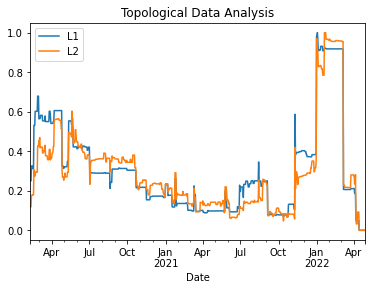

In [26]:
ndf = pd.DataFrame({'L1': L1, 'L2': L2}, index=pd.to_datetime(tsdf.iloc[start:end].date))
ndf.head()
ndf.plot()
plt.title("Topological Data Analysis")
plt.xlabel("Date")

# Appendix

In [33]:
# Visualize the landscape
def norm_graph(start, end, w, ax):
    L1, L2 = compute_landscape_norms(start, end, w)
    
    # Normalizing the landscapes
    min_max_scaler = MinMaxScaler()
    L1 = min_max_scaler.fit_transform(L1.reshape(-1,1)).reshape(-1)
    L2 = min_max_scaler.fit_transform(L2.reshape(-1,1)).reshape(-1)
    
    # ndf = norm dataframe
    ndf = pd.DataFrame({'L1': L1, 'L2': L2}, index=pd.to_datetime(tsdf.iloc[start:end].date))
    ax = ndf.L1.plot(linewidth=2.0, color='r', ax=ax)
    ax = ndf.L2.plot(linewidth=2.0, color='b', ax=ax)

    years = mdates.YearLocator()
    months = mdates.MonthLocator()
    yearsFmt = mdates.DateFormatter('%Y')

    # format the ticks
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yearsFmt)
    ax.xaxis.set_minor_locator(months)

    datemin = pd.to_datetime(tsdf.iloc[start].date)
    datemax = pd.to_datetime(tsdf.iloc[end].date)
    ax.set_xlim(datemin, datemax)
    ax.set_title('Landscape Norm (w=' + str(w) + ')')
    ax.legend()
    return ax

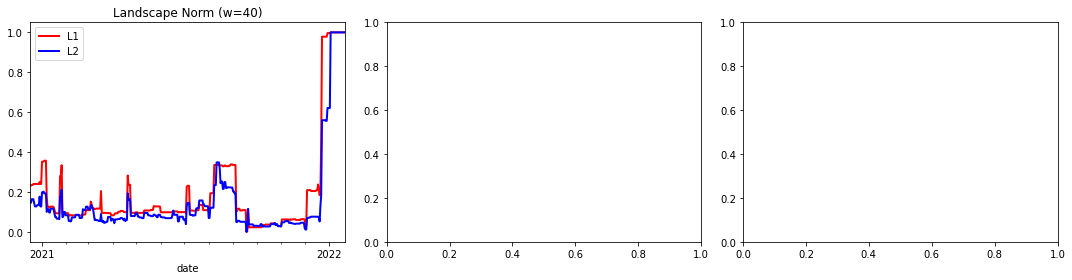

In [34]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

ws = [40,80,120]
for i in range(1):
    w = ws[i]
    period = 400
    jan = idx('1/21/22')
    start = jan - period
    end = jan
    norm_graph(start, end, w, ax=axs[i])
fig.tight_layout()

In [35]:
start

330

In [36]:
end

730

In [37]:
w

40

In [38]:
L1, L2 = compute_landscape_norms(start, end, w)

In [39]:
min_max_scaler = MinMaxScaler()
L1 = min_max_scaler.fit_transform(L1.reshape(-1,1)).reshape(-1)
L2 = min_max_scaler.fit_transform(L2.reshape(-1,1)).reshape(-1)

In [40]:
ndf = pd.DataFrame({'L1': L1, 'L2': L2}, index=pd.to_datetime(tsdf.iloc[start:end].date))

In [41]:
ndf

,L1,L2
date,,
2020-12-17,0.231982,0.153167
2020-12-18,0.231982,0.145740
2020-12-19,0.234617,0.163641
2020-12-20,0.234617,0.163641
2020-12-21,0.239858,0.163582
...,...,...
2022-01-16,1.000000,1.000000
2022-01-17,1.000000,1.000000
2022-01-18,1.000000,1.000000


<AxesSubplot:xlabel='date'>

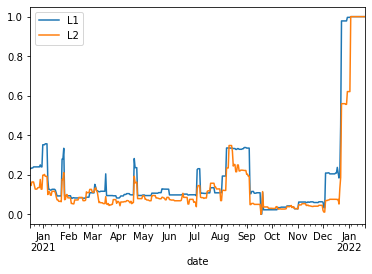

In [42]:
ndf.plot()

In [43]:
jan

730